# Deconvolve simulated data with linear functions, vary number of samples

In [28]:
import torch
from time_deconv.time_deconv_simulator import *
from time_deconv.time_deconv import *

# Configure

In [29]:
device = torch.device("cuda:0")
dtype = torch.float32
dtype_np = np.float32

# Load data

In [30]:
bulk_anndata_path = "/home/nbarkas/disk1/work/deconvolution_method/datasets/ebov/load_data_python/ebov_bulk.h5ad"
sc_anndata_path = "/home/nbarkas/disk1/work/deconvolution_method/datasets/ebov/load_data_python/ebov_sc.h5ad"

In [31]:
with open(bulk_anndata_path, 'rb') as fh:
    bulk_anndata  = anndata.read_h5ad(fh)
with open(sc_anndata_path, 'rb') as fh:
    sc_anndata = anndata.read_h5ad(fh)

In [32]:
# select samples only after or on tp 0
bulk_anndata = bulk_anndata[bulk_anndata.obs['dpi_time'] >= 0,]

In [33]:
ebov_dataset = DeconvolutionDataset(
    sc_anndata = sc_anndata,
    sc_celltype_col = "Subclustering_reduced",
    bulk_anndata = bulk_anndata,
    bulk_time_col = "dpi_time",
    dtype_np = dtype_np,
    dtype = dtype,
    device=device,
    feature_selection_method = 'overdispersed_bulk_and_high_sc' #'overdispersed_bulk'
)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.1044e-10): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


# Run Deconvolution

In [7]:
pseudo_time_reg_deconv = TimeRegularizedDeconvolution(
    dataset=ebov_dataset,
    polynomial_degree = 10,
    basis_functions = "polynomial",
    device=device,
    dtype=dtype)

In [8]:
pseudo_time_reg_deconv.fit_model(n_iters=5_001, verbose=True, log_frequency=1000)

[iteration: 0]   loss: 30368182.39
[iteration: 1000]   loss: 8946567.73
[iteration: 2000]   loss: 3625967.20
[iteration: 3000]   loss: 2062609.65
[iteration: 4000]   loss: 1486528.28
[iteration: 5000]   loss: 1226848.55


# Examine Outputs

<AxesSubplot:title={'center':'Losses'}, xlabel='iteration', ylabel='ELBO Loss'>

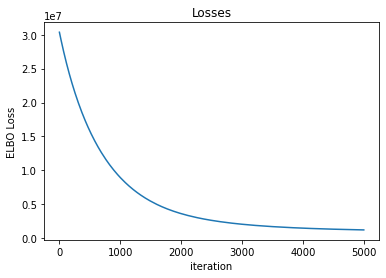

In [34]:
# plot the losses
pseudo_time_reg_deconv.plot_loss()

In [10]:
# calculate and plot composition trajectories
pseudo_time_reg_deconv.calculate_composition_trajectories(n_intervals = 1000)
pseudo_time_reg_deconv.plot_composition_trajectories()

<AxesSubplot:xlabel='$\\phi_g$', ylabel='Counts'>

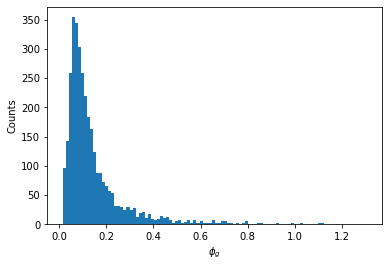

In [12]:
# examine the per-gene dispersions
pseudo_time_reg_deconv.plot_phi_g_distribution()

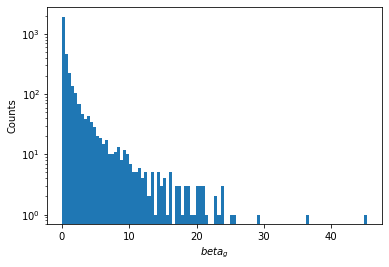

In [13]:
# examine the gene capture coefficients
pseudo_time_reg_deconv.plot_beta_g_distribution()
matplotlib.pyplot.yscale('log')

# Simulation -- Vary number of samples

In [35]:
# trajectory generating function
trajectory_type = 'periodic'

n_samples = list(range(10,100,10)) 
n_samples

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [36]:
# Use a single trajectory for all iterations
trajectory_coef = sample_trajectories(
    type = trajectory_type,
    num_cell_types = pseudo_time_reg_deconv.w_hat_gc.shape[1]
)

/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[iteration: 0]   loss: 211644.01
[iteration: 1000]   loss: 171765.84
[iteration: 2000]   loss: 161199.97
[iteration: 3000]   loss: 157730.86


/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[iteration: 0]   loss: 315024.98
[iteration: 1000]   loss: 284648.52
[iteration: 2000]   loss: 279370.68
[iteration: 3000]   loss: 278290.52


/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[iteration: 0]   loss: 447189.70
[iteration: 1000]   loss: 415127.08
[iteration: 2000]   loss: 410726.42
[iteration: 3000]   loss: 409838.96


/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[iteration: 0]   loss: 586858.45
[iteration: 1000]   loss: 546754.48
[iteration: 2000]   loss: 542252.52
[iteration: 3000]   loss: 541216.98


/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[iteration: 0]   loss: 715242.45
[iteration: 1000]   loss: 671485.97
[iteration: 2000]   loss: 667292.50
[iteration: 3000]   loss: 666229.08


/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[iteration: 0]   loss: 837337.89
[iteration: 1000]   loss: 788765.00
[iteration: 2000]   loss: 784546.20
[iteration: 3000]   loss: 783397.30


/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[iteration: 0]   loss: 981249.01
[iteration: 1000]   loss: 923351.46
[iteration: 2000]   loss: 918606.34
[iteration: 3000]   loss: 917174.04


/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[iteration: 0]   loss: 1116574.14
[iteration: 1000]   loss: 1051155.12
[iteration: 2000]   loss: 1045932.60
[iteration: 3000]   loss: 1044313.50


/opt/conda/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


[iteration: 0]   loss: 1244252.89
[iteration: 1000]   loss: 1178111.47
[iteration: 2000]   loss: 1172516.75
[iteration: 3000]   loss: 1170643.91


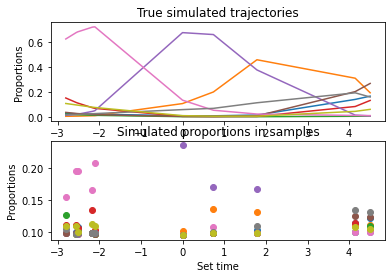

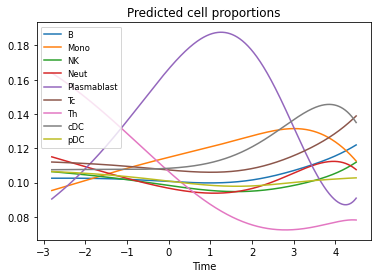

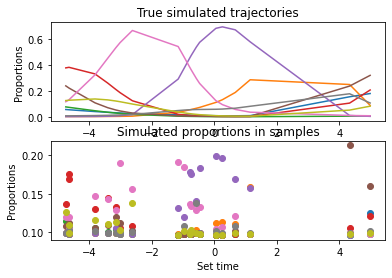

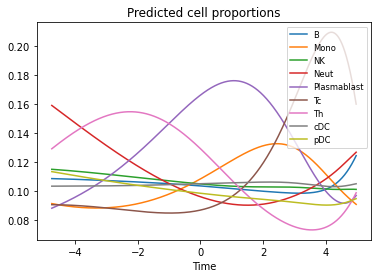

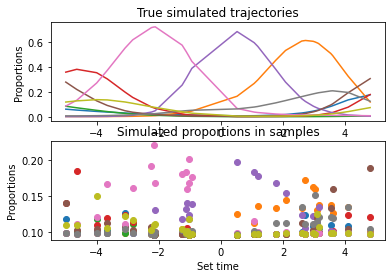

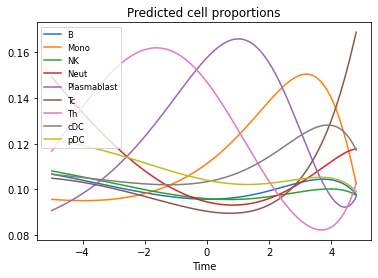

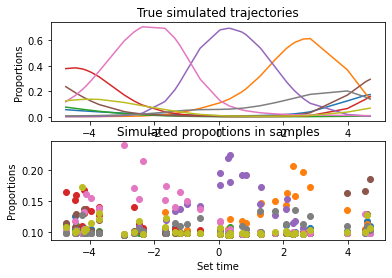

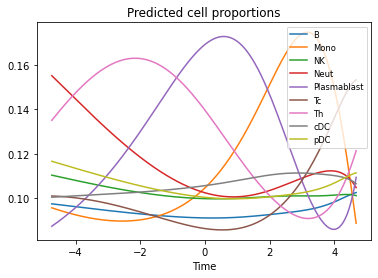

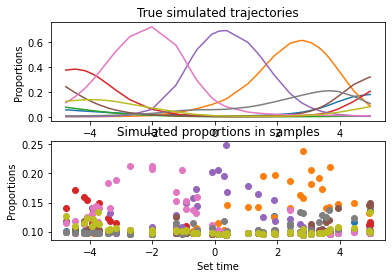

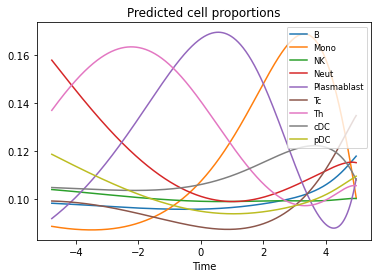

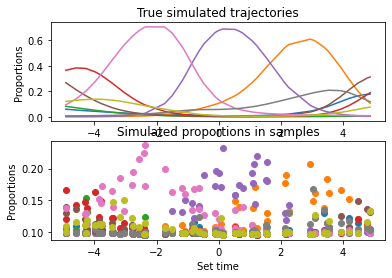

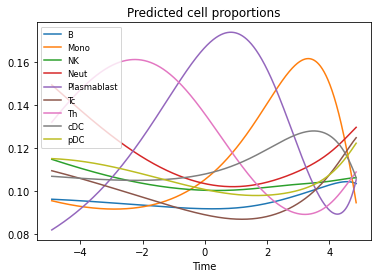

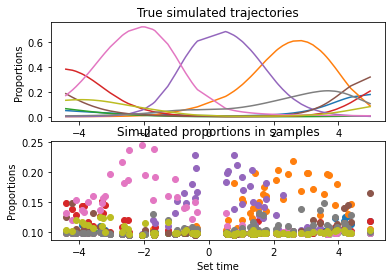

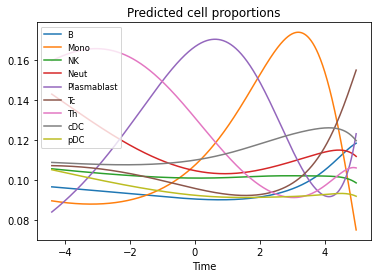

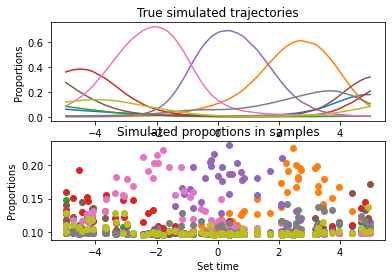

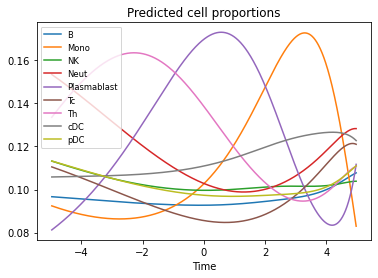

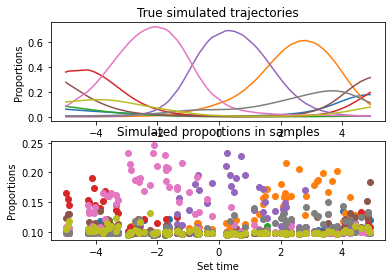

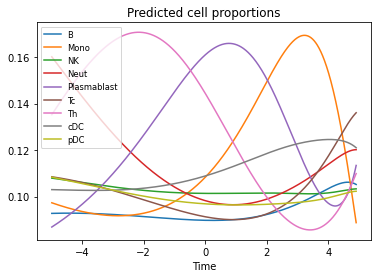

In [17]:
df_n = []
l1_error = []
shape_l1_error = []

a = 10

for n in n_samples:
    
    sim_res = simulate_data(
        num_samples=n, 
        reference_deconvolution=pseudo_time_reg_deconv, 
        trajectory_type=trajectory_type, 
        dirichlet_alpha = a,
        trajectory_coef = trajectory_coef
    )
    
    plot_simulated_proportions(sim_res)
    
    simulated_bulk = generate_anndata_from_sim(
        sim_res, 
        reference_deconvolution=pseudo_time_reg_deconv)
    
    ebov_simulated_dataset = DeconvolutionDataset(
        sc_anndata = sc_anndata,
        sc_celltype_col = "Subclustering_reduced",
        bulk_anndata = simulated_bulk,
        bulk_time_col = "time",
        dtype_np = dtype_np,
        dtype = dtype,
        device = device,
        feature_selection_method = 'common' 
    )
    
    pseudo_time_reg_deconv_sim = TimeRegularizedDeconvolution(
        dataset=ebov_simulated_dataset,
        polynomial_degree = 10,
        basis_functions = "polynomial",
        device=device,
        dtype=dtype)
    
    pseudo_time_reg_deconv_sim.fit_model(n_iters=3_001, verbose=True, log_frequency=1000)
    
    errors = calculate_prediction_error(sim_res, pseudo_time_reg_deconv_sim)
    
    df_n.append(n)
    l1_error.append(errors['L1_error_norm'])
    shape_l1_error.append(errors['shape_L1_error'])
    
    pseudo_time_reg_deconv_sim.plot_composition_trajectories()

<AxesSubplot:xlabel='n'>

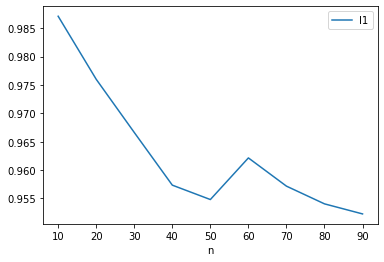

In [37]:
# Plot L1 loss
error_df = pd.DataFrame({'n':df_n, 'l1': list(x.item() for x in l1_error)})
error_df.plot(x='n',y='l1')

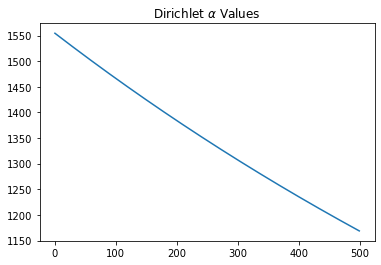

In [40]:
# Plot Dirichlet alpha values

alphas = list(pseudo_time_reg_deconv.param_store_hist[i]['dirichlet_alpha'] for i in range(len(pseudo_time_reg_deconv.param_store_hist)))

matplotlib.pyplot.plot(alphas[-500:])
matplotlib.pyplot.title(r'Dirichlet $ \alpha $ Values')
matplotlib.pyplot.show()